Proje hakkında bilgi verilmesi
-Projenin konusu, amacı, değişkenlerinin belirtilmesi,
-Hangi değişkenin bağımlı, hangi değişkenin ya da değişkenlerin bağımsız
değişken olduğunun belirtilmesi,
-Veri setinin açıklanması.

1) Proje Hakkında Bilgi
Projenin Konusu:
Bu projede, bireylerin çeşitli sağlık göstergelerine göre kalp hastalığına yakalanma durumları incelenmektedir.

Projenin Amacı:
Kalp hastalığı riskini etkileyen faktörleri analiz ederek, hangi değişkenlerin bu hastalıkla ilişkili olduğunu belirlemek ve çeşitli istatistiksel analizlerle bu ilişkiyi test etmektir.

Veri Seti:
Kullanılan veri seti Heart Disease UCI veri setidir. Bu veri seti, Cleveland klinik merkezinden toplanmış ve bireylerin yaş, cinsiyet, kan basıncı, kolesterol gibi sağlık göstergeleri ile kalp hastalığına sahip olup olmadıklarını içermektedir.

Bağımlı Değişken (Y):

target: Kalp hastalığı durumu (1 = hasta, 0 = sağlıklı)

Bağımsız Değişkenler (X):

age: Yaş

sex: Cinsiyet

cp: Göğüs ağrısı tipi

trestbps: İstirahat kan basıncı

chol: Serum kolestrol

fbs: Açlık kan şekeri

restecg: Dinlenme elektrokardiyografik sonuçlar

thalach: Maksimum kalp atış hızı

exang: Egzersize bağlı angina

oldpeak: ST depresyonu

slope: Egzersize bağlı ST segment eğimi

ca: Floroskopi ile renklendirilen ana damar sayısı

thal: Talasemi tipi

2) Gerekli kütüphanelerin yüklenmesi

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


📦 Kullanılan Kütüphaneler ve Görevleri
Kütüphane	Görevi
pandas	                                   Veri setini yüklemek, tablo şeklinde işlemek (DataFrame yapısı ile)
numpy	                                   Sayısal işlemler ve dizilerle çalışma
matplotlib.pyplot	                       Grafik çizimi (histogram, scatter plot, vs.)
seaborn	                                   Matplotlib’e dayalı daha şık ve kolay grafikler
scipy.stats	                               İstatistiksel testler (hipotez testi, güven aralığı, vs.)
statsmodels.api	                           Regresyon ve ANOVA gibi ileri düzey istatistiksel modellemeler
sklearn.linear_model.LinearRegression	   Makine öğrenmesi için basit doğrusal regresyon modeli oluşturma
sklearn.metrics	                           Regresyon sonuçlarını değerlendirmek için hata ve başarı metrikleri (örneğin MSE, R²)

3) Veri setinin yüklenmesi
-Veri setinin incelenmesi (yani head(), tail() vb. kodlarla veri setinin keşfedilmesi),
-Veri setinin betimsel istatistiklerinin bulunması ve yorumlanması.

In [3]:
# Veri setini yükle
df = pd.read_csv("heart.csv", encoding='latin1')

# İlk 5 satırı görüntüle
print(data.head())
# Veri çerçevesi hakkında bilgi
print(df.info())

# Eksik veri var mı?
print(df.isnull().sum())

#betimsel istatikler
print(df.describe())



   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 

4) Veri setinin grafiklerle görselleştirilmesi
-Değişkenlerin histogramlarının çizilmesi,
-Saçılım grafiği (scatter plot) çizilmesi,
-Korelasyon matrisinin oluşturulması ve istenirse grafikle gösterilmesi.

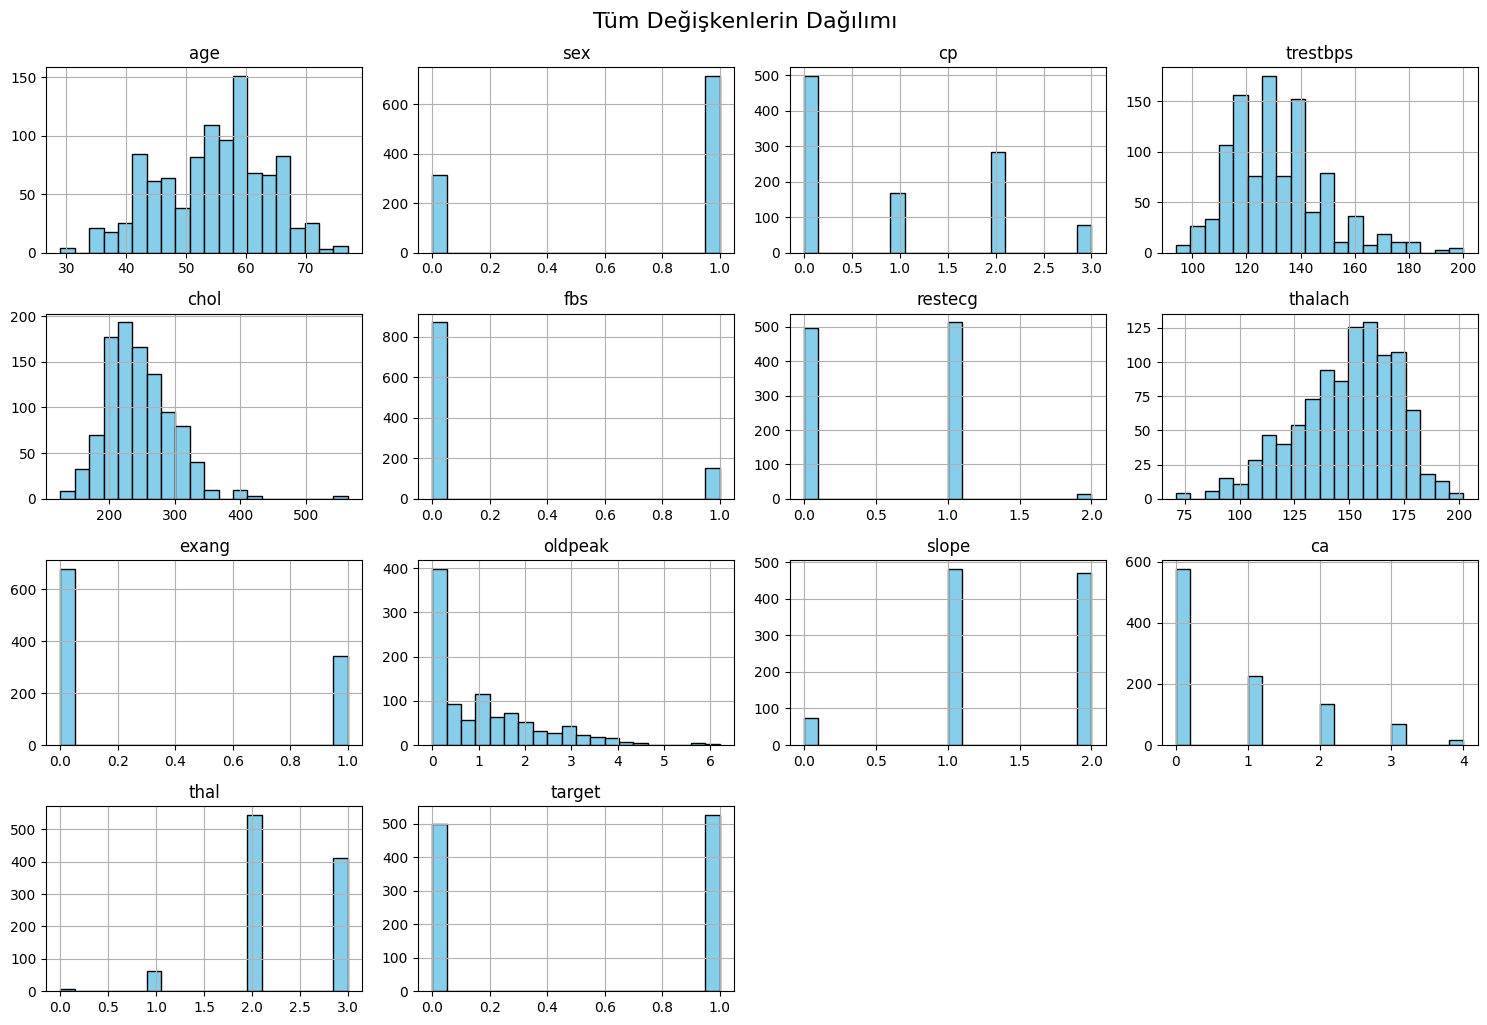

In [4]:
# Tüm sütunlar için histogram
df.hist(bins=20, figsize=(15, 10), color='skyblue', edgecolor='black')
plt.tight_layout()
plt.suptitle('Tüm Değişkenlerin Dağılımı', fontsize=16, y=1.02)
plt.show()

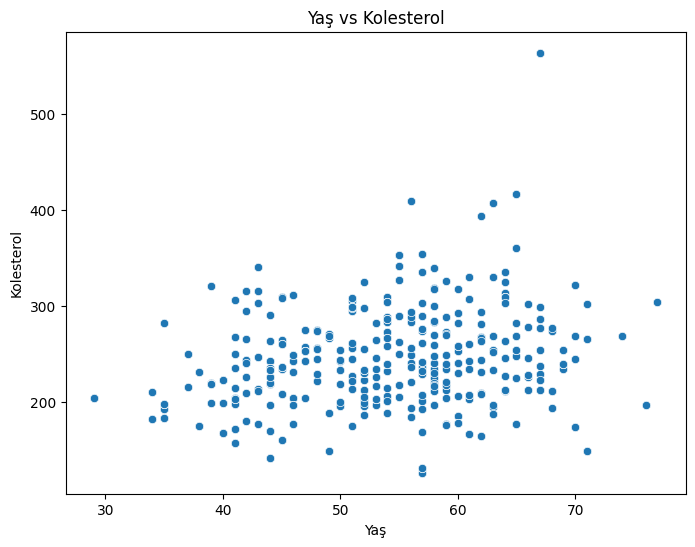

In [5]:
#Saçılım grafiği – Örnek: yaş ile kolesterol arasındaki ilişki
plt.figure(figsize=(8, 6))
sns.scatterplot(x='age', y='chol', data=df)
plt.title("Yaş vs Kolesterol")
plt.xlabel("Yaş")
plt.ylabel("Kolesterol")
plt.show()

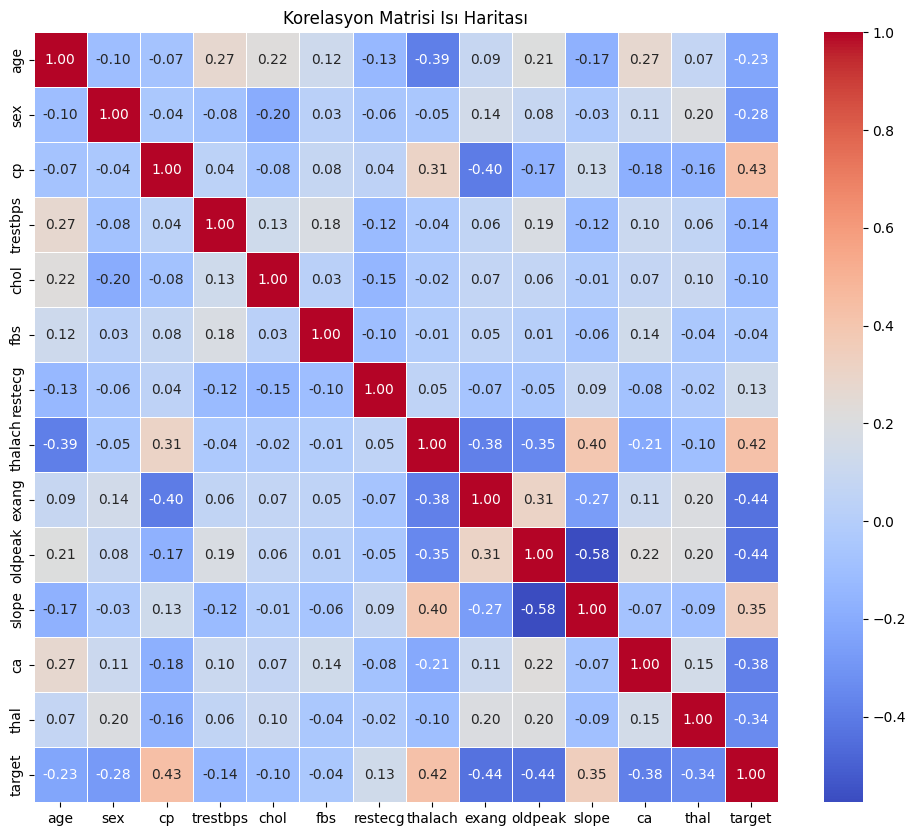

In [6]:
#Korelasyon matrisi
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Korelasyon Matrisi Isı Haritası")
plt.show()